In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
!pip install pmdarima

In [65]:
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
import pmdarima as pm

# Data
 

In [66]:
#Data 불러오기. KMSK data를 다운 받음. BI에서 crosstap기능 이용
df = pd.read_csv('https://raw.githubusercontent.com/parandeung/BCWoo/main/CM_CN_MY.csv')
df.tail(5)

,week(year)_vsl,CN-MY,Year,Week,Date
165,20220206,1343,2022,6,2022-01-31
166,20220207,1428,2022,7,2022-02-07
167,20220208,1478,2022,8,2022-02-14
168,20220309,1572,2022,9,2022-02-21
169,20220310,1541,2022,10,2022-02-28


In [67]:
df=df.dropna()

In [68]:
df['date']=pd.to_datetime(df['Date'])
df.tail(2)

,week(year)_vsl,CN-MY,Year,Week,Date,date
168,20220309,1572,2022,9,2022-02-21,2022-02-21
169,20220310,1541,2022,10,2022-02-28,2022-02-28


In [69]:
df.dtypes

week(year)_vsl             int64
CN-MY                      int64
Year                       int64
Week                       int64
Date                      object
date              datetime64[ns]
dtype: object

In [70]:
df_t=df[:162]
df_t.tail()

,week(year)_vsl,CN-MY,Year,Week,Date,date
157,20211251,1381,2021,51,2021-12-13,2021-12-13
158,20211252,1487,2021,52,2021-12-20,2021-12-20
159,20211253,1567,2021,53,2021-12-27,2021-12-27
160,20220101,1632,2022,1,2022-01-01,2022-01-01
161,20220102,1606,2022,2,2022-01-03,2022-01-03


In [71]:
df_t=df_t[['Date','CN-MY']]
df_t.set_index("Date", inplace=True)
df_t.head(2)

,CN-MY
Date,
2018-12-10,208
2018-12-17,253


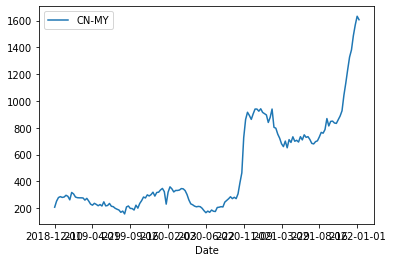

In [72]:
fig = df_t.plot()

In [73]:
#plt.figure(figsize=(10, 6))
#plt.plot(df_t['Date'], df_t['TEU'])

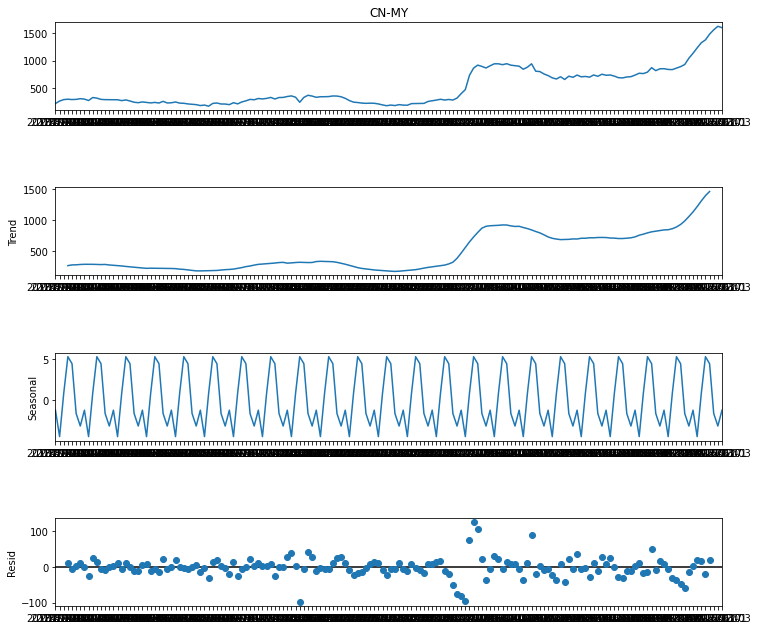

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(df_t['CN-MY'],model='additive', period=7)
fig=res.plot()
fig.set_size_inches(12,10)
plt.show()

In [75]:
!pip install --upgrade openpyxl

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


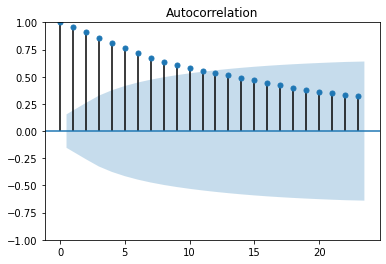

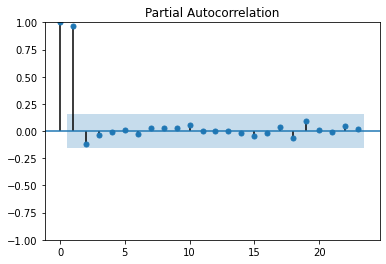

<Figure size 720x432 with 0 Axes>

In [76]:
plot_acf(df_t['CN-MY'])
plot_pacf(df_t['CN-MY'])
plt.figure(figsize=(10, 6))
plt.show()

# 차분

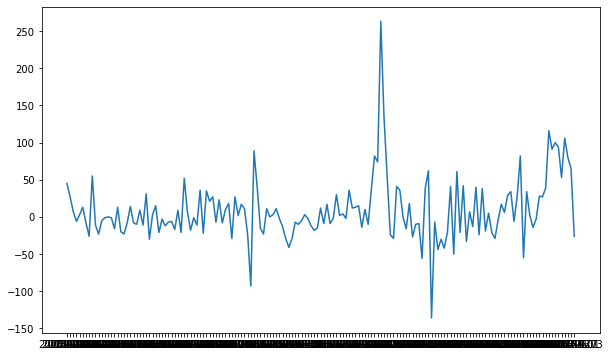

In [77]:
#1차 차분
diff_1=df_t['CN-MY'].diff().dropna()
plt.figure(figsize=(10, 6))
plt.plot(diff_1)
plt.show()

# ACF, PACF

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


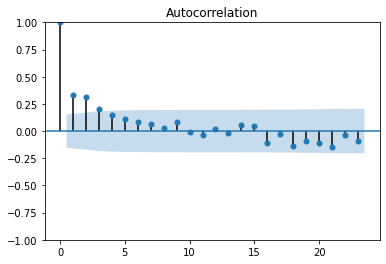

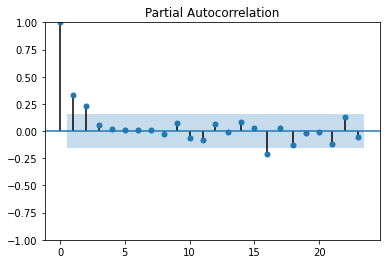

In [78]:
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

# ARIMA(p,d,q)판단
 

https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima.model.ARIMA.html

라이브러리 이름이 arima_model이었는데, arima.model로 바뀌었고, 그러면서 함수들이나 파라미터가 다 조금씩 바뀌어서 새로 해야 하는 상황임

In [79]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_t['CN-MY'], order = (2,1,1))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  CN-MY   No. Observations:                  162
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -816.445
Date:                Thu, 03 Mar 2022   AIC                           1640.889
Time:                        08:19:42   BIC                           1653.215
Sample:                             0   HQIC                          1645.894
                                - 162                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5638      0.268      2.104      0.035       0.039       1.089
ar.L2          0.1382      0.142      0.972      0.331      -0.140       0.417
ma.L1         -0.3156      0.238     -1.324      0.185      -0.783       0.151
sigma2      1484.1881     80.572     18.421      0.000    1326.270    1642.107
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               417.59
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               3.90   Skew:                             0.87
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
import itertools
#Parameter search
print('Examples of parameter combination for Seasonal ARIMA...')
p = range(0,3)
d = range(1,2)
q = range(0,3)
pdq = list(itertools. product(p,d,q))

aic = []
for i in pdq:
    model = ARIMA(df_t.values, order = (i))
    model_fit = model.fit()
    print(f'ARIMA:{i} >> AIC : {round(model_fit.aic,2)}')
    aic.append(round(model_fit.aic,2))

Examples of parameter combination for Seasonal ARIMA...
ARIMA:(0, 1, 0) >> AIC : 1667.42
ARIMA:(0, 1, 1) >> AIC : 1655.04
ARIMA:(0, 1, 2) >> AIC : 1646.09
ARIMA:(1, 1, 0) >> AIC : 1647.39
ARIMA:(1, 1, 1) >> AIC : 1639.62
ARIMA:(1, 1, 2) >> AIC : 1640.99
ARIMA:(2, 1, 0) >> AIC : 1639.72
ARIMA:(2, 1, 1) >> AIC : 1640.89
ARIMA:(2, 1, 2) >> AIC : 1642.83


In [81]:
model = ARIMA(df_t['CN-MY'], order = (2,1,0))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  CN-MY   No. Observations:                  162
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -816.859
Date:                Thu, 03 Mar 2022   AIC                           1639.718
Time:                        08:19:43   BIC                           1648.963
Sample:                             0   HQIC                          1643.472
                                - 162                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2693      0.066      4.086      0.000       0.140       0.398
ar.L2          0.2437      0.074      3.309      0.001       0.099       0.388
sigma2      1492.0063     80.620     18.507      0.000    1333.994    1650.019
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):               416.54
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               3.88   Skew:                             0.82
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Evaluation

In [82]:
fore = model_fit.forecast(steps=6)
fore

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


162    1614.840502
163    1610.884304
164    1611.973569
165    1611.302665
166    1611.387471
167    1611.246788
Name: predicted_mean, dtype: float64

In [83]:
y_pred = pd.DataFrame(fore)
#y_pred = y_pred.T.head(6)
y_pred.columns = ['yhat']
y_pred.head()

,yhat
162,1614.840502
163,1610.884304
164,1611.973569
165,1611.302665
166,1611.387471


In [84]:
y_pred['y']=pd.to_numeric(y_pred['yhat'])
y_pred.dtypes

yhat    float64
y       float64
dtype: object

In [85]:
y_pred.round(2).head(5)

,yhat,y
162,1614.84,1614.84
163,1610.88,1610.88
164,1611.97,1611.97
165,1611.30,1611.30
166,1611.39,1611.39


In [86]:
y_true = df[162:]
y_true['y'] = pd.to_numeric(y_true['CN-MY'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [87]:
y_true.head()

,week(year)_vsl,CN-MY,Year,Week,Date,date,y
162,20220103,1559,2022,3,2022-01-10,2022-01-10,1559
163,20220104,1475,2022,4,2022-01-17,2022-01-17,1475
164,20220205,1383,2022,5,2022-01-24,2022-01-24,1383
165,20220206,1343,2022,6,2022-01-31,2022-01-31,1343
166,20220207,1428,2022,7,2022-02-07,2022-02-07,1428


# Auto Arima
auto arima  다음 링크의 내용을 참조하였음. https://assaeunji.github.io/data%20analysis/2021-09-25-arimastock/

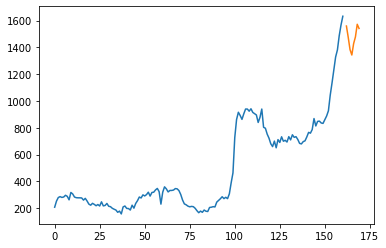

In [88]:
y_train = df['CN-MY'][:161]
y_test = df['CN-MY'][162:]
y_train.plot()
y_test.plot()

In [89]:
model = pm.auto_arima (y_train, d = 1, m=12, seasonal = True, trace = True)
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1633.979, Time=1.37 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1652.605, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1636.625, Time=0.17 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1643.493, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1657.699, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1632.188, Time=1.21 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1630.260, Time=0.63 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=1632.177, Time=1.49 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1628.396, Time=0.52 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=1630.342, Time=1.01 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=1630.349, Time=1.28 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=1632.201, Time=2.21 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1633.466, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1626.965, Time=0.38 sec
 ARIMA(1,1,1)(1,0,0

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [90]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  161
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -810.420
Date:                Thu, 03 Mar 2022   AIC                           1626.840
Time:                        08:20:04   BIC                           1636.065
Sample:                             0   HQIC                          1630.586
                                - 161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8568      0.069     12.492      0.000       0.722       0.991
ma.L1         -0.5851      0.097     -6.031      0.000      -0.775      -0.395
sigma2      1465.8538     76.555     19.148      0.0

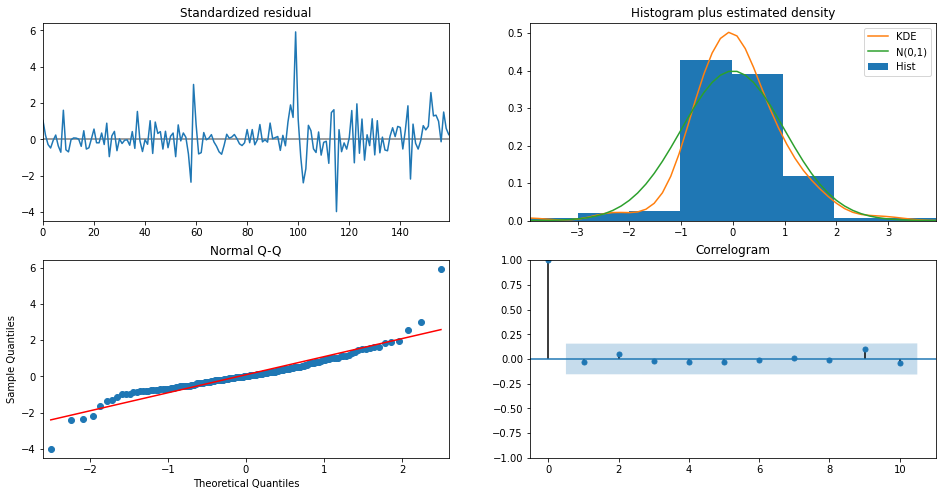

In [91]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()

In [92]:
y_predict = model.predict(n_periods=len(y_test)) 
y_predict = pd.DataFrame(y_predict,index = y_test.index,columns=['Prediction'])
y_predict.head(6)

,Prediction
162,1681.957288
163,1724.762646
164,1761.439950
165,1792.866497
166,1819.793992
167,1842.866523


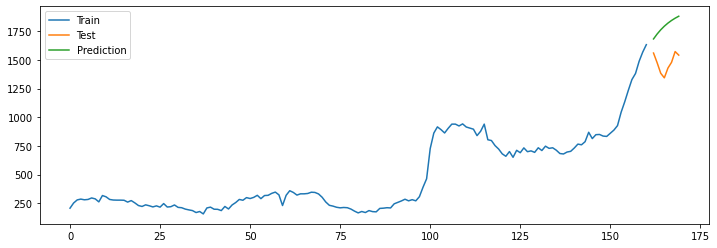

In [93]:
# 테스트 데이터 개수만큼 예측
y_predict = model.predict(n_periods=len(y_test)) 
y_predict = pd.DataFrame(y_predict,index = y_test.index,columns=['Prediction'])

# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(y_train, label='Train')        # 훈련 데이터
plt.plot(y_test, label='Test')          # 테스트 데이터
plt.plot(y_predict, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()

In [94]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1 # 한 스텝씩!
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [95]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model.update(new_ob)

In [96]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  169
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -862.596
Date:                Thu, 03 Mar 2022   AIC                           1731.192
Time:                        08:20:06   BIC                           1740.564
Sample:                             0   HQIC                          1734.995
                                - 169                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6247      0.116      5.381      0.000       0.397       0.852
ma.L1         -0.2939      0.148     -1.981      0.048      -0.585      -0.003
sigma2      1660.6147     90.442     18.361      0.0

In [97]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = y_train.index, y = y_train, name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_test, name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))
    
    # 신뢰 구간---------------------------------------------------------
    , go.Scatter(x = y_test.index.tolist() + y_test.index[::-1].tolist() 
                ,y = pred_upper + pred_lower[::-1] ## 상위 신뢰 구간 -> 하위 신뢰 구간 역순으로
                ,fill='toself'
                ,fillcolor='rgba(0,0,30,0.1)'
                ,line=dict(color='rgba(0,0,0,0)')
                ,hoverinfo="skip"
                ,showlegend=False)
])

fig.update_layout(height=400, width=1000, title_text="ARIMA()모형")
fig.show()

In [98]:
def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    
print(f"MAPE: {MAPE(y_test, y_pred):.3f}")

MAPE: 4.719


In [99]:
import sklearn.metrics as skm
skm.mean_absolute_error(y_test, y_pred)

70.3266421379144

In [100]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test, y_pred)

6332.2330797612285

In [101]:
def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    
MAPE(y_test, y_pred)

4.71889499330058

In [102]:
y_actual = df['CN-MY'][162:].values

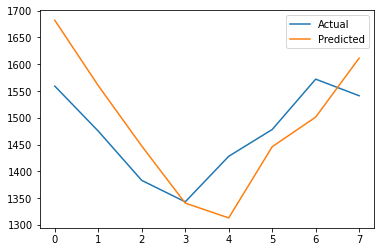

In [103]:
from matplotlib import pyplot
pyplot.plot(y_actual, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [104]:
df_t=df[['date','CN-MY']]
df_t.set_index("date", inplace=True)
df_t.head(2)

,CN-MY
date,
2018-12-10,208
2018-12-17,253


전체 data를 이용해서 3월 예측

In [105]:
model2 = pm.auto_arima (df_t, d = 1, m=12, seasonal = True, trace = True)
model2.fit(df_t)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1740.979, Time=2.62 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1759.578, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1740.527, Time=0.35 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1747.883, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1763.020, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1739.044, Time=0.11 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1740.593, Time=0.46 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1740.894, Time=1.44 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1735.070, Time=0.25 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1736.712, Time=0.62 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=1736.754, Time=0.82 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=1737.667, Time=2.26 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=1736.615, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=1736.762, Time=0.65 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [106]:
print(model2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  170
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -864.459
Date:                Thu, 03 Mar 2022   AIC                           1734.918
Time:                        08:20:22   BIC                           1744.308
Sample:                             0   HQIC                          1738.729
                                - 170                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2973      0.068      4.367      0.000       0.164       0.431
ar.L2          0.2005      0.073      2.757      0.006       0.058       0.343
sigma2      1621.4718     89.608     18.095      0.0

In [107]:
def forecast_one_step():
    fc, conf_int = model2.predict(n_periods=1 # 한 스텝씩!
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [108]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model2.update(new_ob)

In [109]:
y_pred

[1550.631061745451,
 1558.0046528203636,
 1454.8063649770215,
 1337.299660436436,
 1312.180740243081,
 1446.737733027441,
 1508.3302849671147,
 1611.0477256338313]

In [110]:
pred_upper

[1629.5539183050255,
 1636.9215052455802,
 1533.7319249481966,
 1416.2744785751606,
 1391.2408376454448,
 1525.8589460686985,
 1587.711821976272,
 1690.5627645577842]

In [111]:
pred_lower 

[1471.7082051858765,
 1479.087800395147,
 1375.8808050058465,
 1258.3248422977113,
 1233.120642840717,
 1367.6165199861834,
 1428.9487479579575,
 1531.5326867098784]